In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

/home/user/my-project-env/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [2]:
data = pd.read_excel('2018_stats.xlsx', index_col=0)

In [3]:
data.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Nacionalitat,Nombre
Any,,,,,,,
2018,9,Sant Andreu,60,Sant Andreu,Dona,Espanya,28076
2018,2,Eixample,9,la Nova Esquerra de l'Eixample,Dona,Espanya,25506
2018,9,Sant Andreu,60,Sant Andreu,Home,Espanya,24997
2018,5,SarriÃ -Sant Gervasi,26,Sant Gervasi - Galvany,Dona,Espanya,22873
2018,2,Eixample,6,la Sagrada FamÃ­lia,Dona,Espanya,22423


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7404 entries, 2018 to 2018
Data columns (total 7 columns):
Codi_Districte    7404 non-null int64
Nom_Districte     7404 non-null object
Codi_Barri        7404 non-null int64
Nom_Barri         7404 non-null object
Sexe              7404 non-null object
Nacionalitat      7404 non-null object
Nombre            7404 non-null int64
dtypes: int64(3), object(4)
memory usage: 462.8+ KB


In [5]:
data=data.rename(columns = {'Codi_Districte':'District_Code', 'Nom_Districte': 'District',
                            'Codi_Barri': 'Neighborhood_Code', 'Nom_Barri': 'Neighborhood', 'Sexe': 'Sex',
                           'Nacionalitat': 'Country', 'Nombre': 'Total'})

In [6]:
data.describe()

,District_Code,Neighborhood_Code,Total
count,7404.000000,7404.000000,7404.000000
mean,6.253647,37.077796,220.007563
std,2.794836,21.106662,1519.467537
min,1.000000,1.000000,0.000000
25%,4.000000,19.000000,5.000000
50%,7.000000,37.000000,18.000000
75%,8.000000,55.000000,48.000000
max,10.000000,73.000000,28076.000000


In [7]:
data.isnull().sum()

District_Code        0
District             0
Neighborhood_Code    0
Neighborhood         0
Sex                  0
Country              0
Total                0
dtype: int64

In [8]:
data.isna().sum()

District_Code        0
District             0
Neighborhood_Code    0
Neighborhood         0
Sex                  0
Country              0
Total                0
dtype: int64

# District

In [9]:
data.District.value_counts()

Nou Barris              1326
Horta-GuinardÃ³         1122
Sant MartÃ­             1020
Sants-MontjuÃ¯c          816
Sant Andreu              714
Eixample                 612
SarriÃ -Sant Gervasi     570
GrÃ cia                  510
Ciutat Vella             408
Les Corts                306
Name: District, dtype: int64

In [10]:
dic = {'Horta-GuinardÃ³': 'Horta-Guinardo', 'Sant MartÃ­': 'Sant Marti', 'Sants-MontjuÃ¯c': 'Sants-Montjuic',
      'SarriÃ -Sant Gervasi': 'Sarria-Sant Gervasi', 'GrÃ cia': 'Gracia'}

In [11]:
data['District'].replace(dic, inplace=True)

[Text(0, 0, 'Nou Barris'),
 Text(0, 0, 'Horta-Guinardo'),
 Text(0, 0, 'Sant Marti'),
 Text(0, 0, 'Sants-Montjuic'),
 Text(0, 0, 'Sant Andreu'),
 Text(0, 0, 'Eixample'),
 Text(0, 0, 'Sarria-Sant Gervasi'),
 Text(0, 0, 'Gracia'),
 Text(0, 0, 'Ciutat Vella'),
 Text(0, 0, 'Les Corts')]

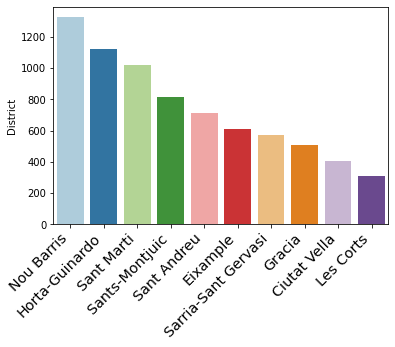

In [12]:
chart = sns.barplot(x=data.District.value_counts().index, y=data.District.value_counts(),
            palette = "Paired")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',
                      fontweight='light', fontsize='x-large')

# Neighborhood 

In [13]:
data.Neighborhood.value_counts()

la Barceloneta                           102
el Baix GuinardÃ³                        102
Sant Antoni                              102
la Sagrada FamÃ­lia                      102
la Prosperitat                           102
la Font de la Guatlla                    102
Navas                                    102
la Trinitat Nova                         102
Vallcarca i els Penitents                102
Sant MartÃ­ de ProvenÃ§als               102
el Clot                                  102
Sants                                    102
el Raval                                 102
ProvenÃ§als del Poblenou                 102
Horta                                    102
la Dreta de l'Eixample                   102
la Vall d'Hebron                         102
Verdun                                   102
el Poblenou                              102
la Salut                                 102
el Coll                                  102
el Parc i la Llacuna del Poblenou        102
Sant GenÃ­

In [14]:
data.Neighborhood.nunique()

73

# Sex

In [15]:
data.Sex.value_counts()

Home    3705
Dona    3699
Name: Sex, dtype: int64

In [16]:
dic = {'Home': 'Men', 'Dona': 'Women'}

In [17]:
data['Sex'].replace(dic, inplace=True)

# Country

In [18]:
data.Country.unique()

array(['Espanya', 'Pakistan', 'Filipines', 'Bangladesh', 'ItÃ lia',
       'Marroc, el', 'Ã_x005F_x005F_x005F_x005F_x005F_x008d_ndia', 'Xina',
       'Hondures', 'FranÃ§a', 'BolÃ\xadvia', 'Regne Unit', 'VeneÃ§uela',
       "Resta paÃ¯sos d'Europa", 'PerÃº', 'ColÃ²mbia',
       "Resta paÃ¯sos d'Ã€sia", 'Alemanya', 'Brasil',
       'RepÃºblica Dominicana', 'Estats Units, els', 'Senegal', 'RÃºssia',
       "Resta paÃ¯sos d'Ã€frica", 'Argentina', 'Equador', 'MÃ¨xic',
       'Romania', 'AlgÃ¨ria', 'UcraÃ¯na', 'Paraguai', 'Portugal',
       'ArmÃ¨nia', 'PaÃ¯sos Baixos', 'Xile', "Resta paÃ¯sos d'AmÃ¨rica",
       'Nepal', 'GeÃ²rgia', 'SuÃ¨cia', 'PolÃ²nia', 'JapÃ³', 'BÃ¨lgica',
       'Cuba', 'El Salvador', 'BulgÃ ria', 'GrÃ¨cia', 'Irlanda',
       'Turquia', 'Uruguai', 'Oceania', 'ApÃ trides / No consta'],
      dtype=object)

In [19]:
dic = {'Espanya': 'Spain', 'Filipines': 'Philippines', 'ItÃ lia': 'Italia',
       'Marroc, el': 'Morocco', 'Ã_x005F_x005F_x005F_x005F_x005F_x008d_ndia': 'India', 'Xina': 'China',
       'Hondures': 'Honduras', 'FranÃ§a': 'France', 'BolÃ\xadvia': 'Bolivia',
       'Regne Unit': 'United Kingdom', 'VeneÃ§uela': 'Venezuela',
       "Resta paÃ¯sos d'Europa": 'Rest Europe', 'PerÃº': 'Peru', 'ColÃ²mbia': 'Colombia',
       "Resta paÃ¯sos d'Ã€sia": 'Rest Asia', 'Alemanya': 'Germany',
       'RepÃºblica Dominicana': 'Dominican Republic', 'Estats Units, els': 'United States', 'RÃºssia': 'Russia',
       "Resta paÃ¯sos d'Ã€frica": 'Rest Africa', 'Equador': 'Ecuador', 'MÃ¨xic': 'Mexic',
       'AlgÃ¨ria': 'Algeria', 'UcraÃ¯na': 'Ukraine', 'Paraguai': 'Paraguay',
       'ArmÃ¨nia': 'Armenia', 'PaÃ¯sos Baixos': 'Netherlands', 'Xile': 'Chile',
       "Resta paÃ¯sos d'AmÃ¨rica": 'Rest America', 'GeÃ²rgia': 'Georgia', 'SuÃ¨cia': 'Sweden', 
       'PolÃ²nia': 'Poland', 'JapÃ³': 'Japan', 'BÃ¨lgica': 'Belgium', 'BulgÃ ria': 'Bulgaria',
       'GrÃ¨cia': 'Greece', 'Irlanda': 'Ireland', 'Turquia': 'Turkey', 'Uruguai': 'Uruguay',
       'ApÃ trides / No consta': 'Stateless'}

In [20]:
data['Country'].replace(dic, inplace=True)

# Disctrict Code

In [21]:
data['District_Code'].value_counts()

8     1326
7     1122
10    1020
3      816
9      714
2      612
5      570
6      510
1      408
4      306
Name: District_Code, dtype: int64

# Neighborhood Code

In [22]:
data['Neighborhood_Code'].value_counts()

71    102
37    102
9     102
13    102
17    102
21    102
29    102
33    102
41    102
1     102
45    102
49    102
53    102
57    102
61    102
65    102
5     102
72    102
67    102
36    102
8     102
12    102
16    102
20    102
28    102
32    102
40    102
68    102
44    102
48    102
     ... 
31    102
39    102
66    102
43    102
47    102
51    102
55    102
59    102
63    102
6     102
70    102
62    102
42    102
10    102
14    102
18    102
30    102
34    102
58    102
38    102
46    102
50    102
54    102
4     102
26    100
27     99
23     99
25     98
24     94
22     80
Name: Neighborhood_Code, Length: 73, dtype: int64

# Total

In [23]:
data['Total'].value_counts()

0        612
1        409
2        324
3        266
4        226
5        213
7        192
6        178
8        164
9        158
10       140
11       126
13       124
12       118
15       117
14       116
18       110
21       108
17       108
16       104
22        94
20        88
23        84
25        83
19        80
24        80
27        73
29        72
32        65
30        64
        ... 
414        1
8654       1
4620       1
526        1
558        1
578        1
8802       1
242        1
202        1
7498       1
11964      1
28076      1
11732      1
3548       1
1505       1
5607       1
13915      1
5763       1
11924      1
3776       1
6321       1
8012       1
22423      1
10137      1
14243      1
14357      1
6233       1
14481      1
162        1
16158      1
Name: Total, Length: 491, dtype: int64

In [24]:
data.Total.sum()

1628936

# Removing possible duplicates

In [25]:
data.drop_duplicates()

,District_Code,District,Neighborhood_Code,Neighborhood,Sex,Country,Total
Any,,,,,,,
2018,9,Sant Andreu,60,Sant Andreu,Women,Spain,28076
2018,2,Eixample,9,la Nova Esquerra de l'Eixample,Women,Spain,25506
2018,9,Sant Andreu,60,Sant Andreu,Men,Spain,24997
2018,5,Sarria-Sant Gervasi,26,Sant Gervasi - Galvany,Women,Spain,22873
2018,2,Eixample,6,la Sagrada FamÃ­lia,Women,Spain,22423
2018,6,Gracia,31,la Vila de GrÃ cia,Women,Spain,21982
2018,4,Les Corts,19,les Corts,Women,Spain,21932
2018,2,Eixample,9,la Nova Esquerra de l'Eixample,Men,Spain,21884
2018,5,Sarria-Sant Gervasi,26,Sant Gervasi - Galvany,Men,Spain,18853


In [26]:
data.shape

(7404, 7)

# Spotting outliers

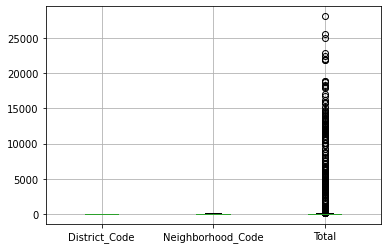

In [27]:
data.boxplot() 

# Visualization

In [28]:
df = data[['District', 'Neighborhood', 'Sex', 'Country', 'Total']]
df

,District,Neighborhood,Sex,Country,Total
Any,,,,,
2018,Sant Andreu,Sant Andreu,Women,Spain,28076
2018,Eixample,la Nova Esquerra de l'Eixample,Women,Spain,25506
2018,Sant Andreu,Sant Andreu,Men,Spain,24997
2018,Sarria-Sant Gervasi,Sant Gervasi - Galvany,Women,Spain,22873
2018,Eixample,la Sagrada FamÃ­lia,Women,Spain,22423
2018,Gracia,la Vila de GrÃ cia,Women,Spain,21982
2018,Les Corts,les Corts,Women,Spain,21932
2018,Eixample,la Nova Esquerra de l'Eixample,Men,Spain,21884
2018,Sarria-Sant Gervasi,Sant Gervasi - Galvany,Men,Spain,18853


In [29]:
women = df[df['Sex'] == 'Women']
women

,District,Neighborhood,Sex,Country,Total
Any,,,,,
2018,Sant Andreu,Sant Andreu,Women,Spain,28076
2018,Eixample,la Nova Esquerra de l'Eixample,Women,Spain,25506
2018,Sarria-Sant Gervasi,Sant Gervasi - Galvany,Women,Spain,22873
2018,Eixample,la Sagrada FamÃ­lia,Women,Spain,22423
2018,Gracia,la Vila de GrÃ cia,Women,Spain,21982
2018,Les Corts,les Corts,Women,Spain,21932
2018,Eixample,la Dreta de l'Eixample,Women,Spain,18364
2018,Sants-Montjuic,Sants,Women,Spain,18230
2018,Eixample,l'Antiga Esquerra de l'Eixample,Women,Spain,18050


In [30]:
women['Total'].sum()

858604

In [31]:
men = df[df['Sex'] == 'Men']
men

,District,Neighborhood,Sex,Country,Total
Any,,,,,
2018,Sant Andreu,Sant Andreu,Men,Spain,24997
2018,Eixample,la Nova Esquerra de l'Eixample,Men,Spain,21884
2018,Sarria-Sant Gervasi,Sant Gervasi - Galvany,Men,Spain,18853
2018,Les Corts,les Corts,Men,Spain,18848
2018,Eixample,la Sagrada FamÃ­lia,Men,Spain,18692
2018,Gracia,la Vila de GrÃ cia,Men,Spain,17940
2018,Eixample,la Dreta de l'Eixample,Men,Spain,15761
2018,Sants-Montjuic,Sants,Men,Spain,15761
2018,Eixample,l'Antiga Esquerra de l'Eixample,Men,Spain,15241


In [32]:
women['Total'].sum()

858604

**Ratio nationals vs non-nationals**

In [33]:
spanish = df[df['Country'] == 'Spain']

ratio_spanish = spanish.Total.sum() / df['Total'].sum()
print(ratio_spanish)

ratio_foreigners = 1 - ratio_spanish
print(ratio_foreigners)

0.8148325041622262
0.1851674958377738


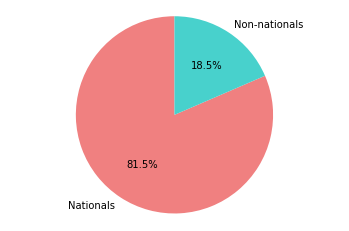

In [34]:
labels= ['Nationals', 'Non-nationals']

colors=['lightcoral', 'mediumturquoise']

sizes= [81.48, 18.51]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [35]:
spanish_f = women[women['Country'] == 'Spain']

ratio_spanish_f = spanish_f.Total.sum() / women['Total'].sum()
print(ratio_spanish_f)

ratio_foreigners_f = 1 - ratio_spanish_f
print(ratio_foreigners_f)

0.8238431220912085
0.17615687790879153


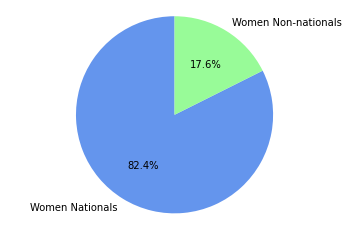

In [36]:
labels= ['Women Nationals', 'Women Non-nationals']

colors=['cornflowerblue', 'palegreen']

sizes= [82.38, 17.61]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [37]:
spanish_m = men[men['Country'] == 'Spain']

ratio_spanish_m = spanish_m.Total.sum() / men['Total'].sum()
print(ratio_spanish_m)

ratio_foreigners_m = 1 - ratio_spanish_m
print(ratio_foreigners_m)

0.8047893635471459
0.19521063645285408


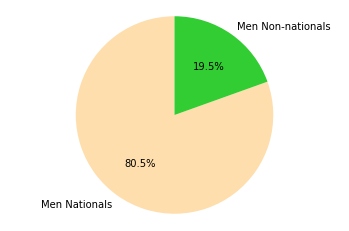

In [38]:
labels= ['Men Nationals', 'Men Non-nationals']

colors=['navajowhite', 'limegreen']

sizes= [80.47, 19.52]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

**Barcelona's Number of Foreigners**

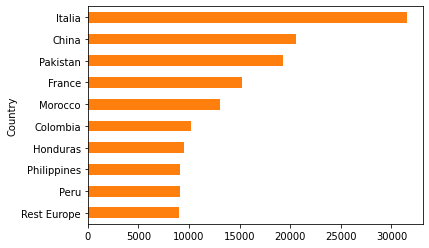

In [39]:
foreigners = df[df['Country'] != 'Spain']
x = foreigners.groupby('Country')['Total'].sum().sort_values().tail(10)

x.plot(kind='barh', color='tab:orange')

**Foreign Women in Barcelona**

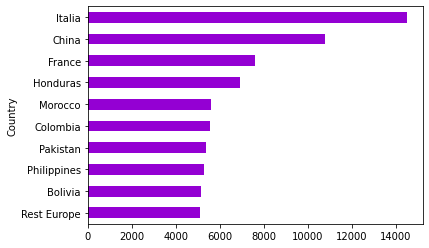

In [40]:
women_fo = women[women['Country'] != 'Spain']
x = women_fo.groupby('Country')['Total'].sum().sort_values().tail(10)

x.plot(kind='barh', color='darkviolet')

**Foreign Men in Barcelona**

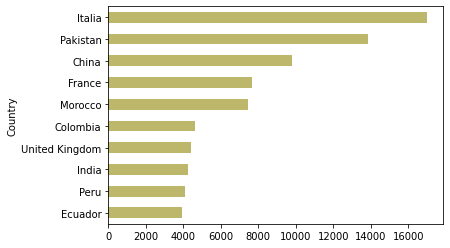

In [41]:
men_fo = men[men['Country'] != 'Spain']

x = men_fo.groupby('Country')['Total'].sum().sort_values().tail(10)

x.plot(kind='barh', color='darkkhaki')

**Population per district**

In [42]:
df_districts=df.groupby('District')['Total'].sum().reset_index()
districts =df_districts.sort_values('Total',ascending=False)

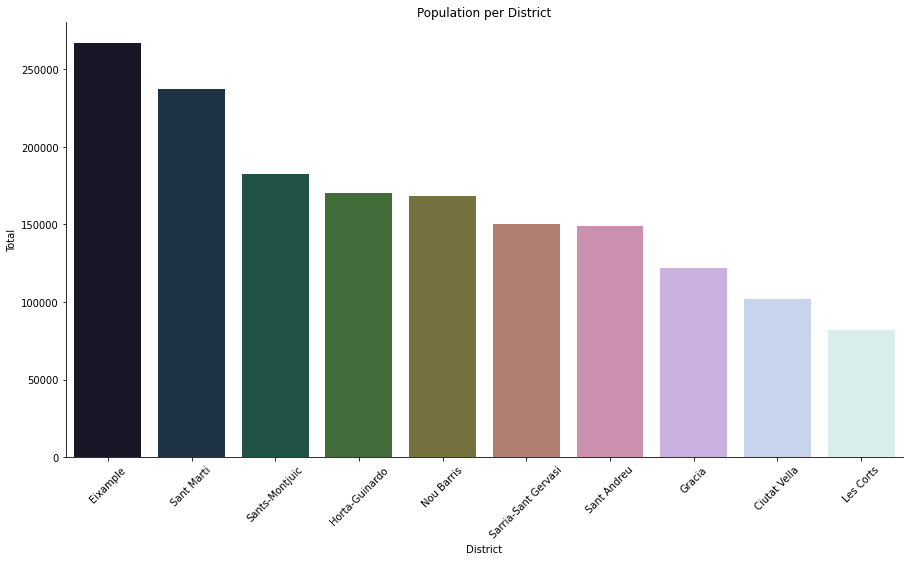

In [43]:
#Vertical way

plt.figure(figsize=(15,8))

plt.title("Population per District")

sns.barplot(data = districts, x='District', y='Total', palette="cubehelix")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)



**Most populated districts**

In [44]:
df_districts=df.groupby('District')['Total'].sum().reset_index()
top5_districts =df_districts.sort_values('Total',ascending=False).head(5)

top5_districts

,District,Total
1,Eixample,266754
7,Sant Marti,237112
8,Sants-Montjuic,182184
3,Horta-Guinardo,170249
5,Nou Barris,168327


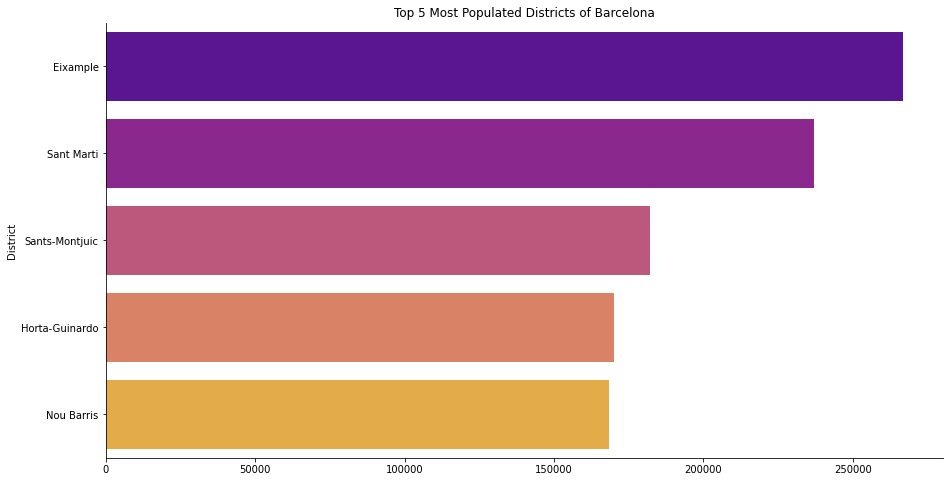

In [45]:
#Horizontal bar plot

plt.figure(figsize=(15, 8))

sns.barplot(data=top5_districts, x='Total', y='District', palette='plasma')

plt.xlabel("")

plt.title("Top 5 Most Populated Districts of Barcelona")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)


**Most populated neighborhoods**

In [46]:
df_neighborhoods=df.groupby('Neighborhood')['Total'].sum().reset_index()
top5_neighborhoods =df_neighborhoods.sort_values('Total',ascending=False).head(5)

top5_neighborhoods

,Neighborhood,Total
58,la Nova Esquerra de l'Eixample,58238
13,Sant Andreu,57662
60,la Sagrada FamÃ­lia,51654
69,la Vila de GrÃ cia,50421
16,Sant Gervasi - Galvany,47753


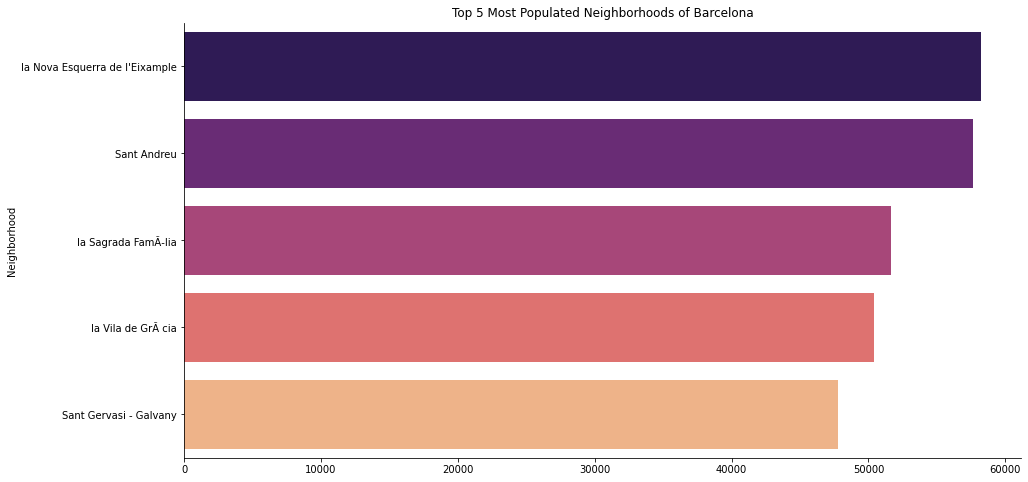

In [47]:
plt.figure(figsize=(15, 8))

sns.barplot(data=top5_neighborhoods, x='Total', y='Neighborhood', palette='magma')

plt.xlabel("")

plt.title("Top 5 Most Populated Neighborhoods of Barcelona")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

**Men and women ratio**

In [48]:
df_sex=df.groupby('Sex')['Total'].sum().reset_index()
df_sex

,Sex,Total
0,Men,770332
1,Women,858604


# Study of Foreign Population in Eixample

In [49]:
eix = df[df['District'] == 'Eixample']

eix_fo = eix[eix['Country'] != 'Spain']

**Foreigners in Eixample (men and women)**

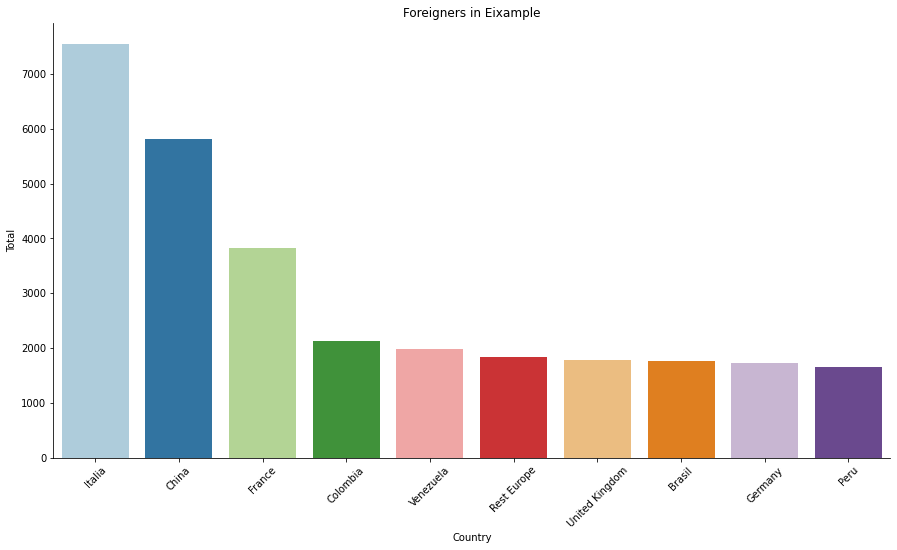

In [50]:
df_eix=eix_fo.groupby('Country')['Total'].sum().reset_index()
eix_fo_sum =df_eix.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners in Eixample")

bar_chart = sns.barplot(data = eix_fo_sum, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

**Foreigners in Eixample (men)**

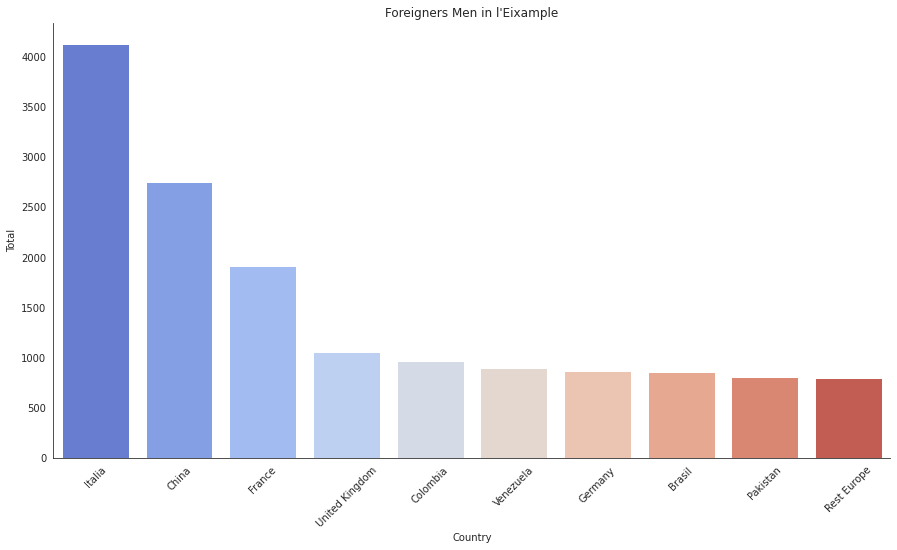

In [51]:
eix_fo_men = eix_fo[eix_fo['Sex']=='Men']

df_eix_men=eix_fo_men.groupby('Country')['Total'].sum().reset_index()
eix_fo_men_sum =df_eix_men.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners Men in l'Eixample")

bar_chart = sns.barplot(data = eix_fo_men_sum, x='Country', y='Total', palette="coolwarm")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

**Foreigners in Eixaple (women)**

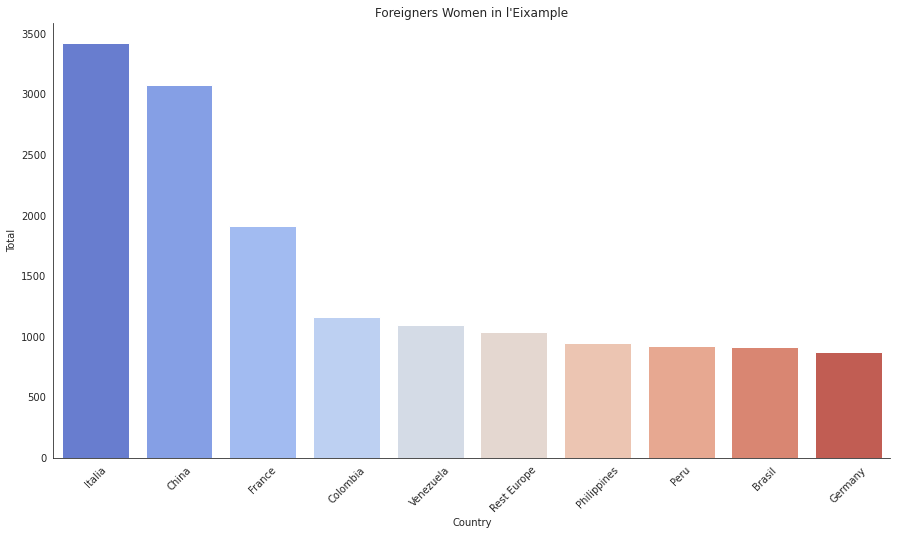

In [52]:
eix_fo_women = eix_fo[eix_fo['Sex']=='Women']

df_eix_women=eix_fo_women.groupby('Country')['Total'].sum().reset_index()
eix_fo_women_sum =df_eix_women.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners Women in l'Eixample")

bar_chart = sns.barplot(data = eix_fo_women_sum, x='Country', y='Total', palette="coolwarm")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Study of Foreign Population in Ciutat Vella

In [53]:
df = data[['District', 'Neighborhood', 'Sex', 'Country', 'Total']]

cv = df[df['District'] == 'Ciutat Vella']

cv_fo = cv[cv['Country'] != 'Spain']

**Foreigners in Ciutat Vella (men and women)**

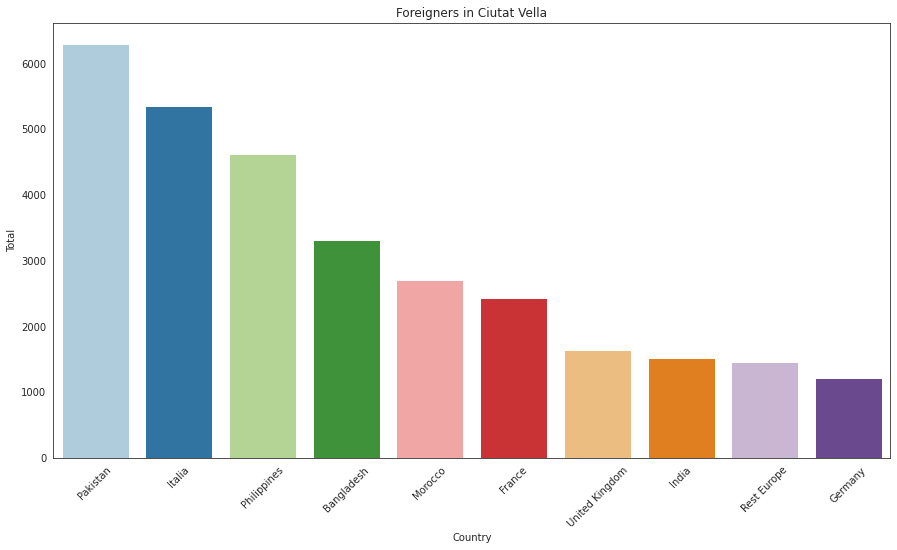

In [54]:
df_cv=cv_fo.groupby('Country')['Total'].sum().reset_index()
cv_fo_sum =df_cv.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners in Ciutat Vella")

sns.barplot(data = cv_fo_sum, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

**Foreigners in Ciutat Vella (men)**

Text(0, 0.5, 'Total')

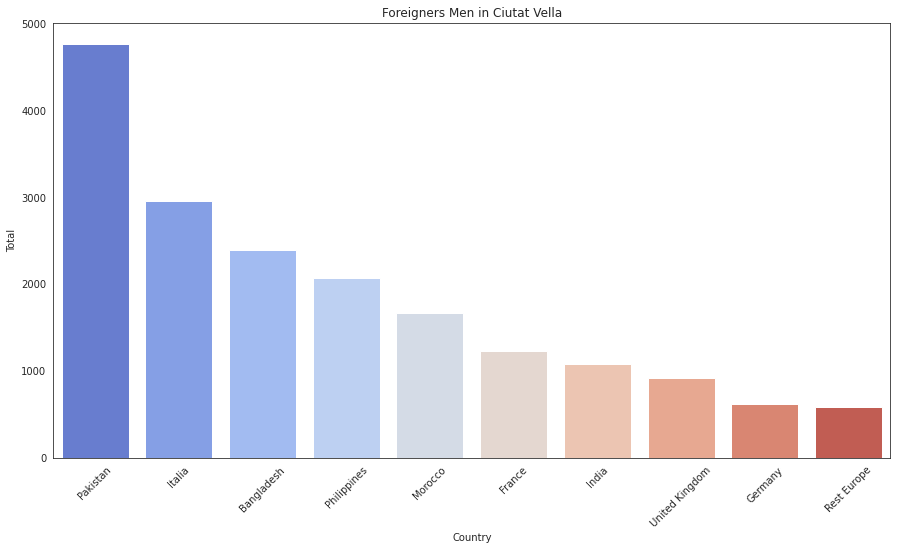

In [55]:
cv_fo_men = cv_fo[cv_fo['Sex']=='Men']

df_cv_men=cv_fo_men.groupby('Country')['Total'].sum().reset_index()
cv_fo_men_sum =df_cv_men.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners Men in Ciutat Vella")

sns.barplot(data = cv_fo_men_sum, x='Country', y='Total', palette="coolwarm")

plt.xticks(rotation=45)

plt.ylabel("Total")

**Foreigners in Ciutat Vella (women)**

Text(0, 0.5, 'Total')

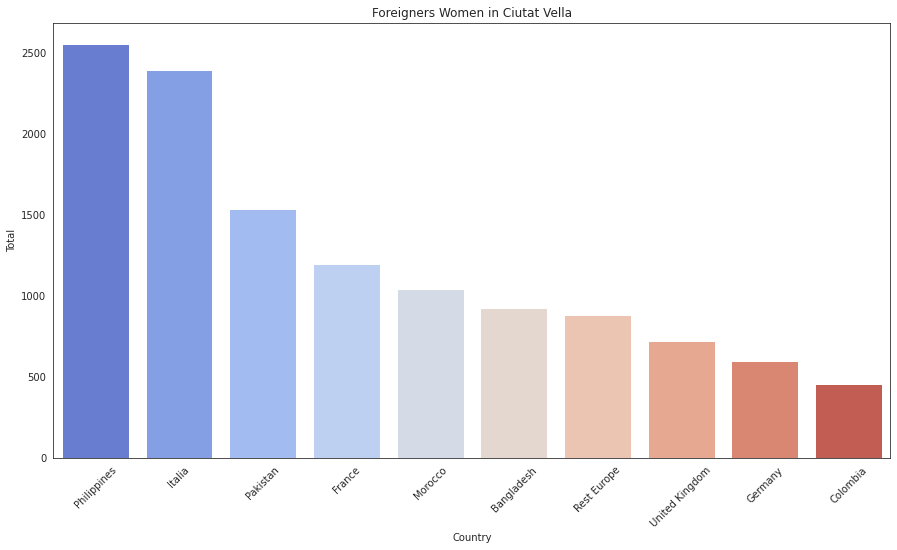

In [56]:
cv_fo_women = cv_fo[cv_fo['Sex']=='Women']

df_cv_women=cv_fo_women.groupby('Country')['Total'].sum().reset_index()
cv_fo_women_sum =df_cv_women.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners Women in Ciutat Vella")

sns.barplot(data = cv_fo_women_sum, x='Country', y='Total', palette="coolwarm")

plt.xticks(rotation=45)

plt.ylabel("Total")

# Study of Foreign Population in Sarrià - Sant Gervasi

In [57]:
ssg = df[df['District'] == 'Sarria-Sant Gervasi']

ssg_fo = ssg[ssg['Country'] != 'Spain']

**Foreigners in Sarrià-Sant Gervasi (men and women)**

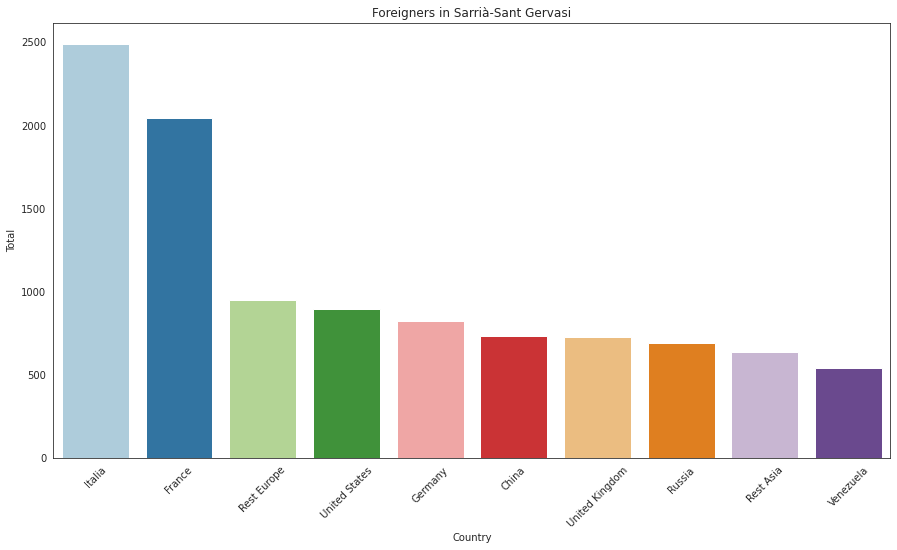

In [58]:
df_ssg=ssg_fo.groupby('Country')['Total'].sum().reset_index()
ssg_fo_sum =df_ssg.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners in Sarrià-Sant Gervasi")

sns.barplot(data = ssg_fo_sum, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

**Foreigners in Sarrià-Sant Gervasi (men)**

Text(0, 0.5, 'Total')

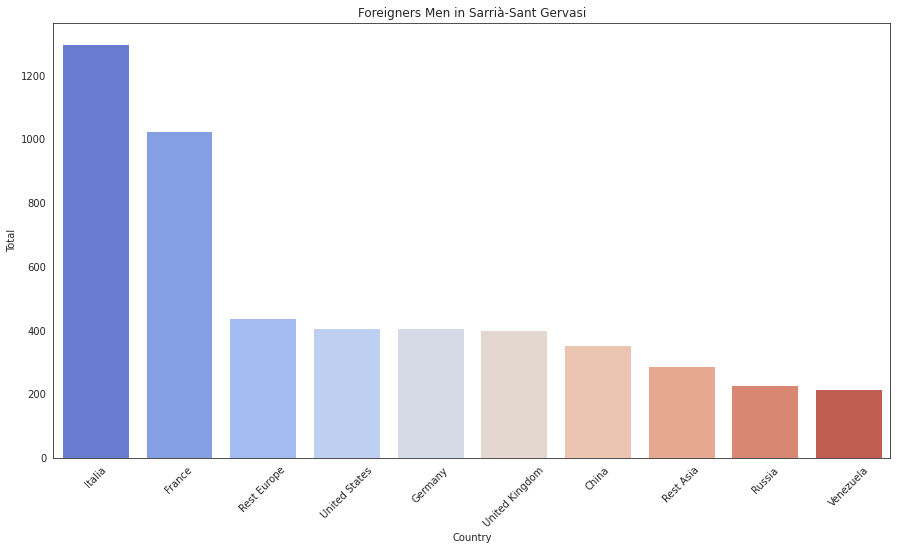

In [59]:
ssg_fo_men = ssg_fo[ssg_fo['Sex']=='Men']

df_ssg_men=ssg_fo_men.groupby('Country')['Total'].sum().reset_index()
ssg_fo_men_sum =df_ssg_men.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners Men in Sarrià-Sant Gervasi")

sns.barplot(data = ssg_fo_men_sum, x='Country', y='Total', palette="coolwarm")

plt.xticks(rotation=45)

plt.ylabel("Total")

**Foreigners in Sarrià-Sant Gervasi (women)**

Text(0, 0.5, 'Total')

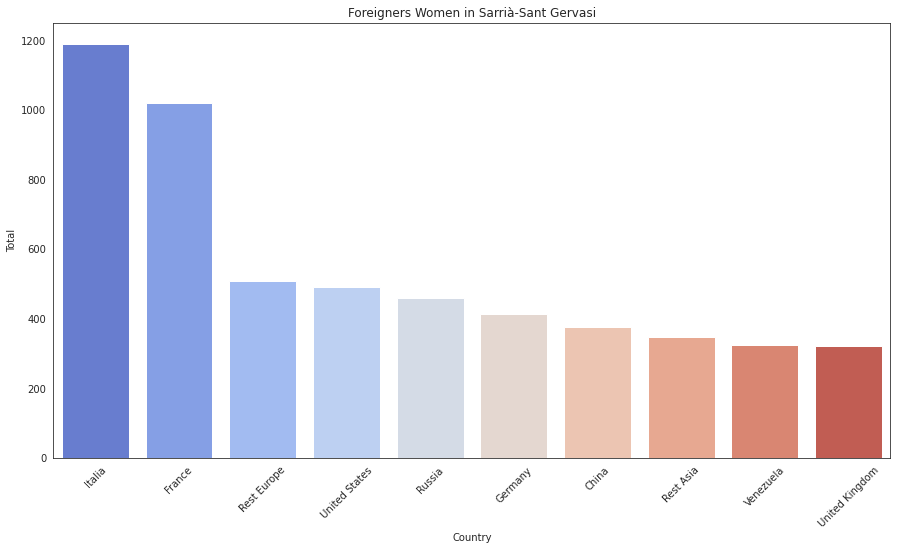

In [60]:
ssg_fo_women = ssg_fo[ssg_fo['Sex']=='Women']

df_ssg_women=ssg_fo_women.groupby('Country')['Total'].sum().reset_index()
ssg_fo_women_sum =df_ssg_women.sort_values('Total',ascending=False).head(10)


#Vertical way

plt.figure(figsize=(15,8))

plt.title("Foreigners Women in Sarrià-Sant Gervasi")

sns.barplot(data = ssg_fo_women_sum, x='Country', y='Total', palette="coolwarm")

plt.xticks(rotation=45)

plt.ylabel("Total")

# Study of Ciutat Vella's Neighborhoods

In [61]:
data_viz = data.copy()

In [62]:
data_viz.head()

,District_Code,District,Neighborhood_Code,Neighborhood,Sex,Country,Total
Any,,,,,,,
2018,9,Sant Andreu,60,Sant Andreu,Women,Spain,28076
2018,2,Eixample,9,la Nova Esquerra de l'Eixample,Women,Spain,25506
2018,9,Sant Andreu,60,Sant Andreu,Men,Spain,24997
2018,5,Sarria-Sant Gervasi,26,Sant Gervasi - Galvany,Women,Spain,22873
2018,2,Eixample,6,la Sagrada FamÃ­lia,Women,Spain,22423


In [63]:
cv = data_viz[data_viz['District'] == 'Ciutat Vella']

In [64]:
cv_neighborhoods = cv.groupby('Neighborhood')
cv_neighborhoods.head()

,District_Code,District,Neighborhood_Code,Neighborhood,Sex,Country,Total
Any,,,,,,,
2018,1,Ciutat Vella,1,el Raval,Women,Spain,12063
2018,1,Ciutat Vella,1,el Raval,Men,Spain,11732
2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Women,Spain,6764
2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Men,Spain,6235
2018,1,Ciutat Vella,3,la Barceloneta,Women,Spain,4929
2018,1,Ciutat Vella,3,la Barceloneta,Men,Spain,4607
2018,1,Ciutat Vella,2,el Barri GÃ²tic,Women,Spain,4287
2018,1,Ciutat Vella,2,el Barri GÃ²tic,Men,Spain,4214
2018,1,Ciutat Vella,1,el Raval,Men,Pakistan,3317


**Neighborhood's weight in Ciutat Vella**

In [65]:
cv_neighborhoods.Total.sum()

Neighborhood
Sant Pere, Santa Caterina i la Ribera    22605
el Barri GÃ²tic                          17035
el Raval                                 47605
la Barceloneta                           14893
Name: Total, dtype: int64

/home/user/my-project-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



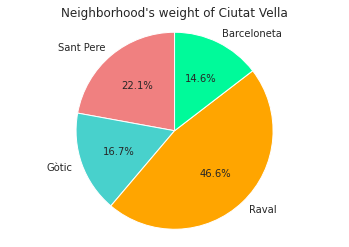

In [66]:
labels= ['Sant Pere', 'Gòtic', 'Raval', 'Barceloneta']

#labels= cv_neighborhoods.Neighborhood.unique()

colors=['lightcoral', 'mediumturquoise', 'orange', 'mediumspringgreen']


sizes= [cv_neighborhoods.Total.sum()]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.title("Neighborhood's weight of Ciutat Vella")

plt.show()

**Ratio foreigners vs Spanish (men and women)**

In [67]:
#sizes= [cv_neighborhoods.Total.sum()]

sizes = ['Sant Pere', 'Barri Gòtic', 'Raval', 'Barceloneta']

cv_spain = cv[cv['Country'] == 'Spain']

greenBars = cv_spain.groupby('Neighborhood')['Total'].sum()/cv_neighborhoods.Total.sum()
orangeBars = cv_fo.groupby('Neighborhood')['Total'].sum()/cv_neighborhoods.Total.sum()

In [68]:
print('Spanish people:')
print(greenBars)

print ('----------------------------------------')

print('Foreign people:')
print(orangeBars)

Spanish people:
Neighborhood
Sant Pere, Santa Caterina i la Ribera    0.575050
el Barri GÃ²tic                          0.499031
el Raval                                 0.499842
la Barceloneta                           0.640301
Name: Total, dtype: float64
----------------------------------------
Foreign people:
Neighborhood
Sant Pere, Santa Caterina i la Ribera    0.424950
el Barri GÃ²tic                          0.500969
el Raval                                 0.500158
la Barceloneta                           0.359699
Name: Total, dtype: float64


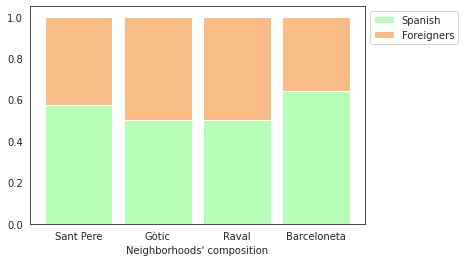

In [69]:
# plot
barWidth = 0.85
names = ('Sant Pere', 'Gòtic', 'Raval', 'Barceloneta')
# Create green Bars
plt.bar(sizes, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Spanish")
# Create orange Bars
plt.bar(sizes, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Foreigners")

 
# Custom x axis
plt.xticks(sizes, names)
plt.xlabel("Neighborhoods' composition")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()
 


**Ratio foreigners vs Spanish (men)**

In [70]:
sizes = ['Sant Pere', 'Barri Gòtic', 'Raval', 'Barceloneta']

cv_men = cv[cv['Sex'] == 'Men']

cv_spain_men = cv_spain[cv_spain['Sex'] == 'Men']

cv_fo_men = cv_fo[cv_fo['Sex'] == 'Men']

blueBars = cv_spain_men.groupby('Neighborhood')['Total'].sum()/cv_men.Total.sum()
orangeBars = cv_fo_men.groupby('Neighborhood')['Total'].sum()/cv_men.Total.sum()

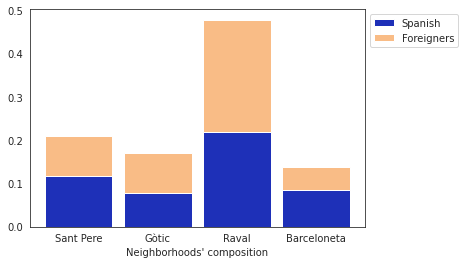

In [71]:
# plot
barWidth = 0.85
names = ('Sant Pere', 'Gòtic', 'Raval', 'Barceloneta')
# Create green Bars
plt.bar(sizes, blueBars, color='#1e30b8', edgecolor='white', width=barWidth, label="Spanish")
# Create orange Bars
plt.bar(sizes, orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Foreigners")

 
# Custom x axis
plt.xticks(sizes, names)
plt.xlabel("Neighborhoods' composition")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

**Ratio foreigners vs Spanish (women)**

In [72]:
sizes = ['Sant Pere', 'Barri Gòtic', 'Raval', 'Barceloneta']

cv_women = cv[cv['Sex'] == 'Women']

cv_spain_women = cv_spain[cv_spain['Sex'] == 'Women']

cv_fo_women = cv_fo[cv_fo['Sex'] == 'Women']

greenBars = cv_spain_women.groupby('Neighborhood')['Total'].sum()/cv_women.Total.sum()
purpleBars = cv_fo_women.groupby('Neighborhood')['Total'].sum()/cv_women.Total.sum()

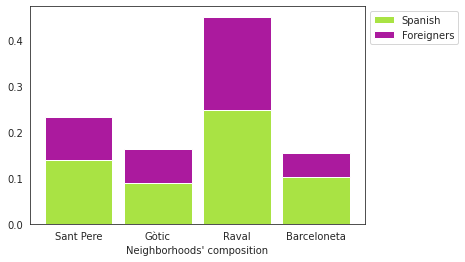

In [73]:
# plot
barWidth = 0.85
names = ('Sant Pere', 'Gòtic', 'Raval', 'Barceloneta')
# Create green Bars
plt.bar(sizes, greenBars, color='#a9e344', edgecolor='white', width=barWidth, label="Spanish")
# Create orange Bars
plt.bar(sizes, purpleBars, bottom=greenBars, color='#ab1a9e', edgecolor='white', width=barWidth, label="Foreigners")

 
# Custom x axis
plt.xticks(sizes, names)
plt.xlabel("Neighborhoods' composition")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

# Study of El Raval

**Foreigners in El Raval**

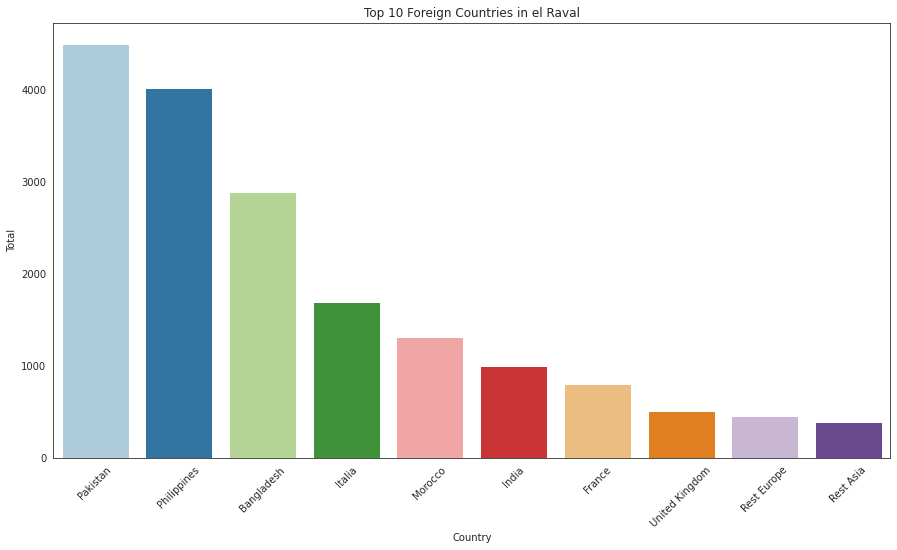

In [74]:
cv_raval = cv[cv['Neighborhood'] == 'el Raval']
cv_raval_fo = cv_raval[cv_raval['Country'] != 'Spain']

abc = cv_raval_fo.groupby('Country')['Total'].sum().reset_index()
abc_sum =abc.sort_values('Total',ascending=False).head(10)

#Vertical way

plt.figure(figsize=(15,8))

plt.title("Top 10 Foreign Countries in el Raval")

sns.barplot(data = abc_sum, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

**Foreigners in el Raval (men)**

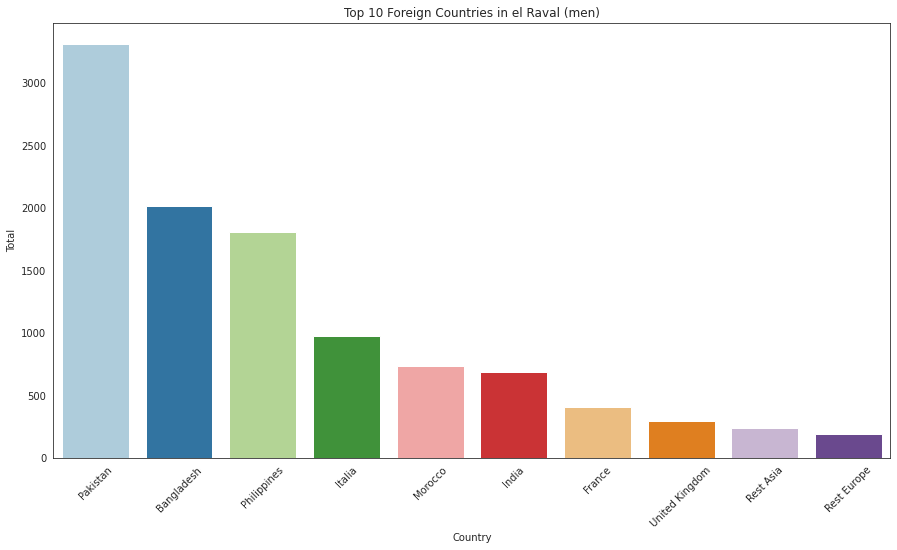

In [75]:
cv_raval_fo_men = cv_raval_fo[cv_raval_fo['Sex'] == 'Men']

total = cv_raval_fo_men.groupby('Country')['Total'].sum().reset_index()
total_sum_ordered_men =total.sort_values('Total',ascending=False).head(10)

#Vertical way

plt.figure(figsize=(15,8))

plt.title("Top 10 Foreign Countries in el Raval (men)")

sns.barplot(data = total_sum_ordered_men, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

**Foreigners in el Raval (women)**

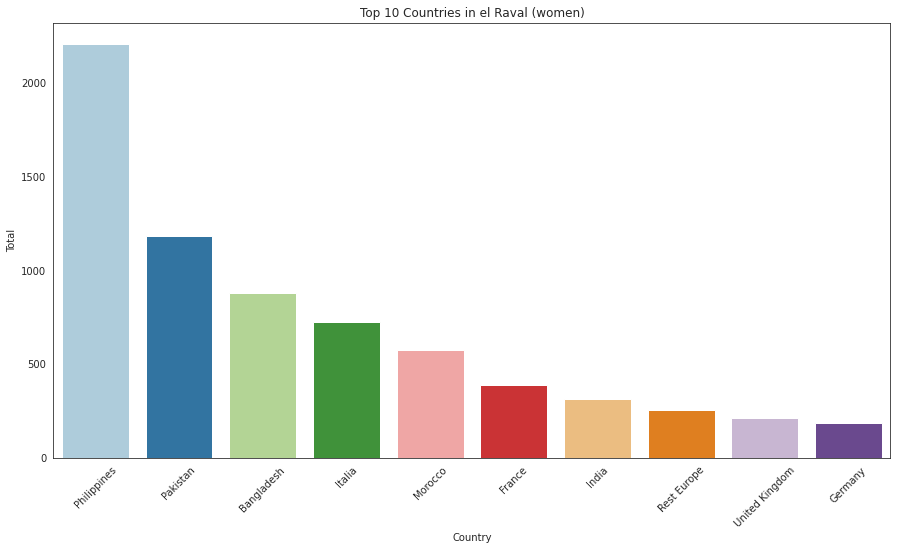

In [76]:
cv_raval_fo_women = cv_raval_fo[cv_raval_fo['Sex'] != 'Men']

total = cv_raval_fo_women.groupby('Country')['Total'].sum().reset_index()
total_sum_ordered_women =total.sort_values('Total',ascending=False).head(10)

#Vertical way

plt.figure(figsize=(15,8))

plt.title("Top 10 Countries in el Raval (women)")

sns.barplot(data = total_sum_ordered_women, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")

# Study of Pedralbes

**Foreigners in Pedralbes**

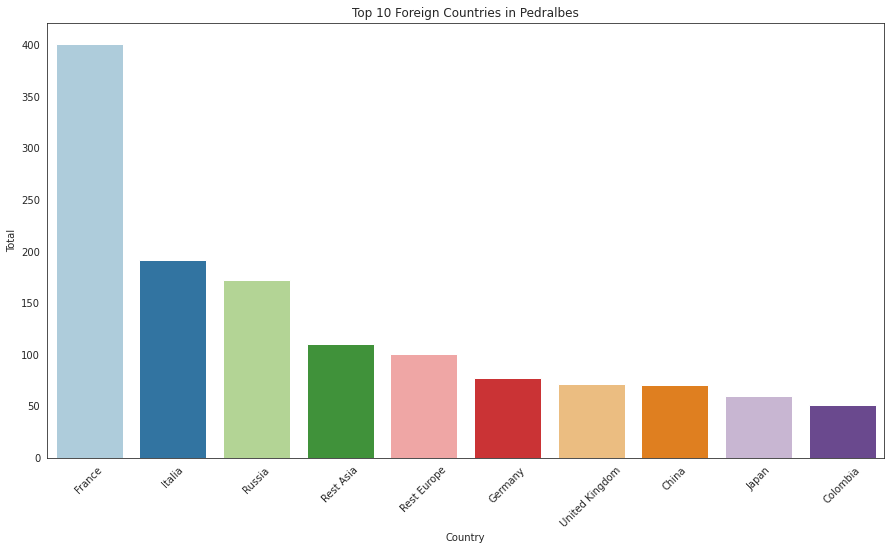

In [77]:
lc = data_viz[data_viz['District'] == 'Les Corts']
lc_ped = lc[lc['Neighborhood'] == 'Pedralbes']

lc_ped_fo = lc_ped[lc_ped['Country'] != 'Spain']

total_ped = lc_ped_fo.groupby('Country')['Total'].sum().reset_index()
total_ped_sum =total_ped.sort_values('Total',ascending=False).head(10)

#Vertical way

plt.figure(figsize=(15,8))

plt.title("Top 10 Foreign Countries in Pedralbes")

sns.barplot(data = total_ped_sum, x='Country', y='Total', palette="Paired")

plt.xticks(rotation=45)

plt.ylabel("Total")

sns.set_style("white")